# PM2.5 prediction

### Import libraries

In [1]:
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from scipy.stats import stats
seed(1)
from fs import methods as m
from fs import model as ml
import geopandas as gpd
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


### Data Import

/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------grid_0_1_0418_0425_2021.gpkg---------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


2022-05-23 15:31:09.220930: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-23 15:31:09.222325: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


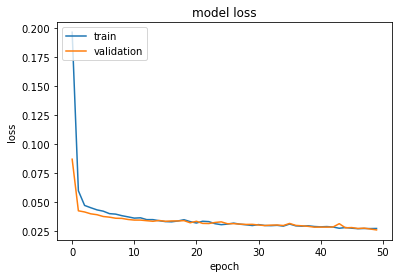

Values predicted:  [[20.78633 ]
 [16.463545]
 [20.365423]
 [16.341446]
 [19.603783]
 [18.565626]
 [16.46598 ]
 [18.893778]
 [21.33644 ]
 [15.593303]
 [15.149358]
 [20.024788]
 [18.928724]
 [20.398066]
 [19.618475]
 [21.386301]
 [19.857826]
 [14.893289]
 [18.270092]
 [15.025679]
 [17.262848]
 [20.677416]
 [20.123293]
 [20.68351 ]
 [20.47577 ]
 [19.49147 ]
 [18.22274 ]
 [17.578379]
 [19.104624]
 [19.523302]
 [20.509478]
 [21.013046]
 [20.039196]
 [16.165833]
 [19.820415]
 [18.88748 ]
 [17.494316]
 [18.726835]
 [18.338968]
 [15.445875]
 [16.304123]
 [19.366371]
 [18.553951]
 [15.635664]
 [18.645159]
 [19.193008]
 [19.21048 ]
 [15.157534]
 [20.873575]
 [19.675966]
 [20.15735 ]
 [15.543538]
 [16.855177]
 [19.466602]]
Values :  [[23.77451484]
 [18.18160347]
 [20.30819625]
 [17.10270714]
 [18.83298897]
 [15.9683037 ]
 [18.97437529]
 [19.78888917]
 [21.1561387 ]
 [17.69204367]
 [15.12911068]
 [22.55729673]
 [20.12699447]
 [17.43185004]
 [15.66264512]
 [21.68441366]
 [19.54443945]
 [13.17174129

/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------VALIDATION WITH ARPA (ALL)---------
Mean Absolute Error:  1.57486228303725
Mean Squared Error:  3.633649541124901
Mean (Y-test): 18.31672157449959
Mean (Y-predicted):  18.511477598122188
R2 score:  0.4875241384318162


/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------grid_0_1_0903_0910_2021.gpkg---------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


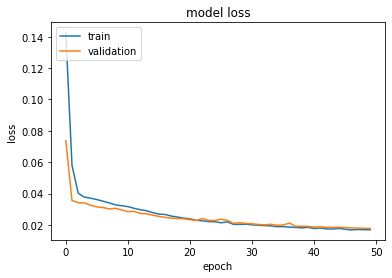

Values predicted:  [[17.640352 ]
 [14.341241 ]
 [16.470518 ]
 [13.113179 ]
 [12.353521 ]
 [17.618164 ]
 [13.096972 ]
 [13.535699 ]
 [12.295888 ]
 [16.471699 ]
 [14.104975 ]
 [16.301638 ]
 [13.506243 ]
 [13.303064 ]
 [17.118425 ]
 [17.687605 ]
 [19.502127 ]
 [19.665497 ]
 [12.507891 ]
 [12.456859 ]
 [17.513605 ]
 [14.048445 ]
 [12.24099  ]
 [13.91589  ]
 [12.497968 ]
 [19.869184 ]
 [16.94582  ]
 [13.643885 ]
 [18.797646 ]
 [13.811407 ]
 [13.424584 ]
 [17.087044 ]
 [14.728718 ]
 [15.774562 ]
 [16.744795 ]
 [12.501565 ]
 [13.119548 ]
 [14.321621 ]
 [19.495502 ]
 [12.182782 ]
 [16.540554 ]
 [16.36848  ]
 [13.93786  ]
 [12.752706 ]
 [14.079308 ]
 [12.452134 ]
 [14.654143 ]
 [16.466051 ]
 [16.6338   ]
 [13.5833025]
 [12.832367 ]
 [16.747093 ]
 [15.063653 ]
 [16.368956 ]]
Values :  [[19.48839036]
 [13.48024522]
 [24.43408639]
 [13.12929398]
 [11.209024  ]
 [16.31562549]
 [13.28140952]
 [15.43671202]
 [10.5209441 ]
 [17.095317  ]
 [17.13729039]
 [15.93881176]
 [14.26118349]
 [13.61696971]
 [19

/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------VALIDATION WITH ARPA (ALL)---------
Mean Absolute Error:  1.5055845180881704
Mean Squared Error:  4.816523085035267
Mean (Y-test): 15.359205870728628
Mean (Y-predicted):  14.97772548028401
R2 score:  0.5709301485299314


/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------grid_0_1_1007_1017_2021.gpkg---------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


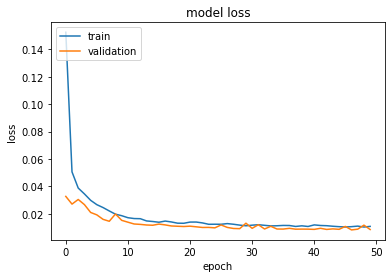

Values predicted:  [[19.414354]
 [18.916372]
 [12.428507]
 [20.325495]
 [24.236046]
 [20.089588]
 [23.82072 ]
 [13.542493]
 [14.828778]
 [16.201244]
 [21.094883]
 [20.105375]
 [13.818101]
 [12.428507]
 [22.924492]
 [24.682762]
 [12.428507]
 [16.184914]
 [16.26264 ]
 [22.327986]
 [17.414293]
 [12.451909]
 [17.006958]
 [12.428507]
 [22.793306]
 [15.8741  ]
 [24.265854]
 [13.848546]
 [16.748339]
 [22.705774]
 [23.779581]
 [12.428507]
 [14.878389]
 [13.644177]
 [12.428507]
 [12.428507]
 [15.948853]
 [16.12934 ]
 [15.930537]
 [12.5721  ]
 [14.346652]
 [12.428507]
 [16.686087]
 [18.742096]
 [20.207926]
 [15.187791]
 [23.357939]
 [22.409779]
 [17.897835]
 [24.539856]
 [16.377626]
 [24.51682 ]
 [12.701042]
 [21.131905]]
Values :  [[16.83012585]
 [17.33017171]
 [15.24995015]
 [23.11855415]
 [24.01534305]
 [21.45439474]
 [26.44425747]
 [14.97053962]
 [15.74134958]
 [19.6794674 ]
 [19.66844158]
 [21.7950776 ]
 [15.44439399]
 [11.05030324]
 [24.88362888]
 [22.14164501]
 [15.508448  ]
 [18.2850594 

/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------VALIDATION WITH ARPA (ALL)---------
Mean Absolute Error:  1.7613523218595901
Mean Squared Error:  4.079686435949427
Mean (Y-test): 17.946663233524674
Mean (Y-predicted):  17.753823808261327
R2 score:  0.7908379174594364


/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------grid_0_1_0717_0724_2021.gpkg---------
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


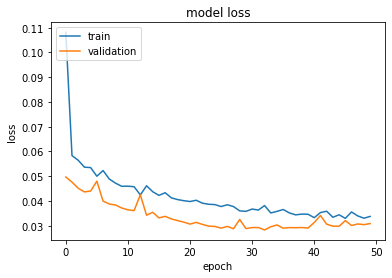

Values predicted:  [[14.381752 ]
 [13.900857 ]
 [12.513705 ]
 [11.548528 ]
 [12.619545 ]
 [12.640884 ]
 [14.024157 ]
 [13.780231 ]
 [12.596765 ]
 [10.900291 ]
 [11.8516035]
 [12.196245 ]
 [14.14873  ]
 [13.495152 ]
 [12.602613 ]
 [10.741238 ]
 [11.671085 ]
 [12.363506 ]
 [12.130039 ]
 [11.9867115]
 [12.08169  ]
 [10.883167 ]
 [11.537473 ]
 [13.463346 ]
 [12.170034 ]
 [13.122054 ]
 [11.955769 ]
 [12.905381 ]
 [11.842607 ]
 [12.469913 ]
 [12.697118 ]
 [13.764209 ]
 [12.675797 ]
 [12.340685 ]
 [13.049665 ]
 [12.028724 ]
 [11.713316 ]
 [12.100002 ]
 [12.039042 ]
 [13.08171  ]
 [11.15333  ]
 [12.676217 ]
 [12.662302 ]
 [12.004975 ]
 [13.256926 ]
 [11.261327 ]
 [13.036707 ]
 [12.006492 ]
 [12.484841 ]
 [11.865538 ]
 [12.942881 ]
 [12.285755 ]
 [13.212311 ]
 [14.176617 ]]
Values :  [[14.41679057]
 [14.13675726]
 [14.06678223]
 [12.23161279]
 [13.35796078]
 [11.35341479]
 [14.64397603]
 [14.0427941 ]
 [12.60604687]
 [10.20311679]
 [12.7852054 ]
 [14.06662131]
 [14.71371341]
 [12.96398017]
 [14

/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------VALIDATION WITH ARPA (ALL)---------
Mean Absolute Error:  1.008285694433923
Mean Squared Error:  1.6280316374489072
Mean (Y-test): 12.971714477298589
Mean (Y-predicted):  12.495167561939784
R2 score:  0.30024190573839726


/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))
/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------grid_0_1_0324_0331_2021.gpkg---------
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


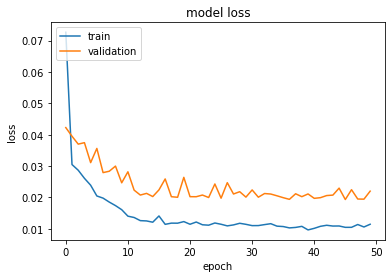

Values predicted:  [[31.78722 ]
 [27.034918]
 [32.94057 ]
 [25.294733]
 [26.223036]
 [29.357769]
 [24.991262]
 [23.962925]
 [26.055754]
 [26.787016]
 [27.164667]
 [33.8287  ]
 [32.814045]
 [28.358175]
 [37.073967]
 [24.287342]
 [27.496538]
 [40.997288]
 [27.6094  ]
 [40.045246]
 [27.78971 ]
 [33.097843]
 [31.184616]
 [33.324127]
 [33.446606]
 [36.496822]
 [24.011011]
 [31.883867]
 [37.209023]
 [30.1193  ]
 [26.646217]
 [33.33883 ]
 [28.118912]
 [32.916737]
 [25.003605]
 [29.085287]
 [25.03566 ]
 [25.647228]
 [26.370466]
 [31.390184]
 [25.796349]
 [26.077507]
 [27.071365]
 [34.693317]
 [28.706137]
 [32.12908 ]
 [31.8571  ]
 [26.59983 ]
 [23.934336]
 [35.911148]
 [36.416027]
 [30.875593]
 [24.457157]
 [24.237955]]
Values :  [[29.42382081]
 [26.77829   ]
 [36.79032711]
 [28.25568814]
 [28.00805988]
 [26.30661897]
 [23.23971302]
 [25.91806342]
 [24.84431857]
 [28.65555018]
 [27.08652179]
 [33.95063902]
 [35.17436908]
 [27.169378  ]
 [38.26921113]
 [24.46832271]
 [26.5970461 ]
 [42.4983998 

/Users/Brescia/Desktop/D-DUST/notebooks/fs/methods.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nB = np.array(list(data.geometry.centroid.apply(lambda x: (x.x, x.y))))


---------VALIDATION WITH ARPA (ALL)---------
Mean Absolute Error:  2.324178612879759
Mean Squared Error:  8.661150379471367
Mean (Y-test): 30.334952857935402
Mean (Y-predicted):  29.719064576285227
R2 score:  0.7139454621649013


In [2]:
RESOLUTION = '0_1'
geopackages = os.listdir('grids_'+RESOLUTION)

TARGET = 'pm25_st'
NUMBER_OF_PARAMS = 8
NUMBER_OF_COVARIATES = NUMBER_OF_PARAMS + 2

results1 = pd.DataFrame(columns=['MAE', 'MSE', 'mean Y-Test', 'mean Y-predicted', 'R2'])
results2 = pd.DataFrame(columns=['MAE', 'MSE', 'mean Y-Test', 'mean Y-predicted', 'R2'])



for index, grid in enumerate(geopackages):
    data = m.increase_data(gpd.read_file('grids_'+RESOLUTION+'/'+ grid), 'pm25_st', 5)
    coll = pd.DataFrame()
    coll['pm25_st'] = data['pm25_st']
    coll['pm25_cams'] = data['pm25_cams']
    coll = coll.dropna(axis=0)

    #print('Mean Absolute Error: ',mean_absolute_error(coll['pm25_cams'], coll['pm25_st'], ))
    #print('Mean Squared Error: ',mean_squared_error(coll['pm25_cams'], coll['pm25_st']))
    #print('R2 score: ',r2_score(coll['pm25_cams'], coll['pm25_st']))

    points_st = gpd.read_file('arpa_stations/pm25_st.gpkg')

    data = m.add_buffer(points_st, data, data, 10)


    data = data[~data[TARGET].isnull()]
    data = data.dropna(axis=1)


    data.pop('geometry')
    data.pop('bottom')
    data.pop('top')
    data.pop('left')
    data.pop('right')


    labels = pd.read_csv('features_' +RESOLUTION +'/'+grid[:-5]+'.csv')['Features']
    #labels = pd.read_csv('fs.csv')['Features']

    labels = ml.remove_int_values(labels.tolist())
    #data.pop('pm25_cams')
    #labels.remove('pm25_cams')


    #read variables which are not null
    score_results = pd.DataFrame()

    #Store dataset in x and y variables
    X = pd.DataFrame(data=data, columns=labels ).dropna(axis = 1)
    X = X.iloc[:, :NUMBER_OF_PARAMS]
    X['lat_cen'] = data['lat_cen']
    X['lng_cen'] = data['lng_cen']

    Y = pd.DataFrame(data=data, columns=[TARGET] )
    Y = Y.values.ravel()


    #NUMBER_OF_COVARIATES = X.shape[1]
    y1 = np.array(Y)

    X_train, X_val, y_train, y_val = train_test_split(X, y1, test_size=0.30)

    y_train=np.reshape(y_train, (-1,1))
    y_val=np.reshape(y_val, (-1,1))

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()

    scaler_x.fit(X_train)
    xtrain_scale=scaler_x.transform(X_train)
    scaler_x.fit(X_val)
    xval_scale=scaler_x.transform(X_val)

    scaler_y.fit(y_train)
    ytrain_scale=scaler_y.transform(y_train)
    scaler_y.fit(y_val)
    yval_scale=scaler_y.transform(y_val)


    print('---------'+ grid +'---------')

    model = Sequential()
    model.add(Dense(NUMBER_OF_COVARIATES, input_dim=NUMBER_OF_COVARIATES, kernel_initializer='normal', activation='relu'))
    model.add(Dense(NUMBER_OF_COVARIATES/2, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.summary()

    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])



    history=model.fit(xtrain_scale, ytrain_scale, epochs=50, batch_size=1, verbose=0, validation_split=0.30)
    predictions = model.predict(xval_scale)

    print(history.history.keys())
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.plot(history.history['accuracy'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    predictions = scaler_y.inverse_transform(predictions)


    results1.loc[index]= [round(mean_absolute_error(y_val, predictions),3), round(mean_squared_error(y_val, predictions),3), round(np.mean(y_val), 3), round(np.mean(predictions), 3), round(r2_score(y_val, predictions), 3)]
    results1.rename(index={index: grid}, inplace=True)





    print('Values predicted: ', predictions)
    print('Values : ', scaler_y.inverse_transform(yval_scale))
    print('---------VALIDATION WITH ARPA (TEST_SET)---------')

    print('Mean Absolute Error: ',mean_absolute_error(y_val, predictions))
    print('Mean Squared Error: ',mean_squared_error(y_val, predictions))
    print('Mean (Y-test):',np.mean(y_val))
    print('Mean (Y-predicted): ',np.mean(predictions))
    print('R2 score: ',r2_score(y_val, predictions))

    #%%

    data_new = m.increase_data(gpd.read_file('grids_'+RESOLUTION+'/'+ grid), 'pm25_st', 5)
    data_new = data_new[~data_new[TARGET].isnull()]
    pm25_obs = data_new['pm25_st']
    X_new = pd.DataFrame(data=data_new, columns=labels).dropna(axis=1)
    X_new = X_new.iloc[:, :NUMBER_OF_PARAMS]

    X_new['lat_cen'] = data_new['lat_cen']
    X_new['lng_cen'] = data_new['lng_cen']
    scaler_x = MinMaxScaler()
    scaler_x.fit(X_new)
    X_new_scale=scaler_x.transform(X_new)




    predictions_pm25 = model.predict(X_new_scale,  batch_size=1)
    predictions_pm25 = pd.Series(np.array(scaler_y.inverse_transform(predictions_pm25)).reshape((-1,)))
    e = pd.DataFrame()

    e['predictions_pm25'] = list(predictions_pm25)
    e['pm25_obs'] = list(pm25_obs)
    e = e.dropna(axis=0)
    print('---------VALIDATION WITH ARPA (ALL)---------')
    print('Mean Absolute Error: ',mean_absolute_error(e['pm25_obs'], e['predictions_pm25']))
    print('Mean Squared Error: ',mean_squared_error(e['pm25_obs'], e['predictions_pm25']))
    print('Mean (Y-test):',np.mean(e['pm25_obs']))
    print('Mean (Y-predicted): ',np.mean(e['predictions_pm25']))
    print('R2 score: ',r2_score(e['pm25_obs'], e['predictions_pm25']))

    results2.loc[index]= [round(mean_absolute_error(e['pm25_obs'], e['predictions_pm25']),3), round(mean_squared_error(e['pm25_obs'], e['predictions_pm25']),3), round(np.mean(e['pm25_obs']),3), round(np.mean(e['predictions_pm25']),3), round(r2_score(e['pm25_obs'], e['predictions_pm25']),3)]
    results2.rename(index={index: grid}, inplace=True)

results1 = results1.T
results2 = results2.T

results1.to_excel('test/keras1'+RESOLUTION+'.xlsx')
results2.to_excel('test/keras2'+RESOLUTION+'.xlsx')
